# Praktikum 6
#### Muhamad Rizal Arfiyan - 22.11.5227 - IF11
#### [https://github.com/rizalarfiyan/big-data](https://github.com/rizalarfiyan/big-data)

## Data Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
%matplotlib inline
sns.set(color_codes=True)

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./rumah.csv')

In [4]:
df.head(10)

,Jumlah_Kamar,Jumlah_Kamar_Mandi,Jumlah_Lantai,Luas_Bangunan,Luas_Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,SHM,Setia Budi,1100000000
1,5,4,3,84,200,SHM,Tebet,2100000000
2,3,3,2,134,130,SHM,Pasar Minggu,2800000000
3,3,2,1,132,100,SHM,Pesanggrahan,1480000000
4,3,4,2,92,147,SHM,Pesanggrahan,2300000000
5,3,2,2,70,72,SHM,Kebayoran Lama,975000000
6,3,2,2,83,75,SHM,Cilandak,885000000
7,2,1,1,60,30,SHM,Pancoran,30000000
8,2,1,1,80,50,SHM,Pancoran,632800000
9,2,1,1,60,28,HGB,Kebayoran Baru,179000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Jumlah_Kamar        238 non-null    int64 
 1   Jumlah_Kamar_Mandi  238 non-null    int64 
 2   Jumlah_Lantai       238 non-null    int64 
 3   Luas_Bangunan       238 non-null    int64 
 4   Luas_Tanah          238 non-null    int64 
 5   Sertifikasi         238 non-null    object
 6   Lokasi              238 non-null    object
 7   Harga               238 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.0+ KB


In [6]:
print(df.isnull().sum())

Jumlah_Kamar          0
Jumlah_Kamar_Mandi    0
Jumlah_Lantai         0
Luas_Bangunan         0
Luas_Tanah            0
Sertifikasi           0
Lokasi                0
Harga                 0
dtype: int64


In [7]:
duplicate_count = df.duplicated().sum()
print("Jumlah data yang duplikat: ", duplicate_count)

Jumlah data yang duplikat:  0


## Normalisasi Data

In [8]:
df.head(10)

,Jumlah_Kamar,Jumlah_Kamar_Mandi,Jumlah_Lantai,Luas_Bangunan,Luas_Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,SHM,Setia Budi,1100000000
1,5,4,3,84,200,SHM,Tebet,2100000000
2,3,3,2,134,130,SHM,Pasar Minggu,2800000000
3,3,2,1,132,100,SHM,Pesanggrahan,1480000000
4,3,4,2,92,147,SHM,Pesanggrahan,2300000000
5,3,2,2,70,72,SHM,Kebayoran Lama,975000000
6,3,2,2,83,75,SHM,Cilandak,885000000
7,2,1,1,60,30,SHM,Pancoran,30000000
8,2,1,1,80,50,SHM,Pancoran,632800000
9,2,1,1,60,28,HGB,Kebayoran Baru,179000000


In [9]:
df.fillna(0, inplace=True)

for column in ["Sertifikasi", "Lokasi"]:
    df[column] = pd.factorize(df[column])[0]

In [10]:
df.head(10)

,Jumlah_Kamar,Jumlah_Kamar_Mandi,Jumlah_Lantai,Luas_Bangunan,Luas_Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,0,0,1100000000
1,5,4,3,84,200,0,1,2100000000
2,3,3,2,134,130,0,2,2800000000
3,3,2,1,132,100,0,3,1480000000
4,3,4,2,92,147,0,3,2300000000
5,3,2,2,70,72,0,4,975000000
6,3,2,2,83,75,0,5,885000000
7,2,1,1,60,30,0,6,30000000
8,2,1,1,80,50,0,6,632800000
9,2,1,1,60,28,1,7,179000000


In [11]:
df.columns = df.columns.str.replace("_", " ").str.title()
print(df.columns)

Index(['Jumlah Kamar', 'Jumlah Kamar Mandi', 'Jumlah Lantai', 'Luas Bangunan',
       'Luas Tanah', 'Sertifikasi', 'Lokasi', 'Harga'],
      dtype='object')


In [12]:
column = ["Jumlah Kamar", "Jumlah Kamar Mandi", "Jumlah Lantai", "Luas Bangunan", "Luas Tanah", "Sertifikasi", "Lokasi", "Harga"]
columnX = "Harga"
columnY = ["Jumlah Kamar", "Jumlah Kamar Mandi", "Jumlah Lantai", "Luas Bangunan", "Luas Tanah", "Sertifikasi", "Lokasi"]

## Statistik Deskriptif

In [13]:
df.describe()

,Jumlah Kamar,Jumlah Kamar Mandi,Jumlah Lantai,Luas Bangunan,Luas Tanah,Sertifikasi,Lokasi,Harga
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,2.380000e+02
mean,2.991597,2.268908,1.773109,81.201681,88.819328,0.037815,4.697479,1.150313e+09
std,0.811269,0.973900,0.587306,29.656850,41.143119,0.248707,2.064588,6.652019e+08
min,2.000000,1.000000,1.000000,15.000000,26.000000,0.000000,0.000000,5.000000e+06
25%,2.000000,2.000000,1.000000,60.000000,55.250000,0.000000,3.000000,6.250000e+08
50%,3.000000,2.000000,2.000000,72.000000,82.000000,0.000000,5.000000,1.100000e+09
75%,3.000000,3.000000,2.000000,94.000000,120.000000,0.000000,6.750000,1.600000e+09
max,6.000000,4.000000,3.000000,200.000000,200.000000,2.000000,8.000000,2.900000e+09


In [14]:
df1 = df.copy()
df1.head()

,Jumlah Kamar,Jumlah Kamar Mandi,Jumlah Lantai,Luas Bangunan,Luas Tanah,Sertifikasi,Lokasi,Harga
0,6,1,1,148,148,0,0,1100000000
1,5,4,3,84,200,0,1,2100000000
2,3,3,2,134,130,0,2,2800000000
3,3,2,1,132,100,0,3,1480000000
4,3,4,2,92,147,0,3,2300000000


## Univariate Analysis

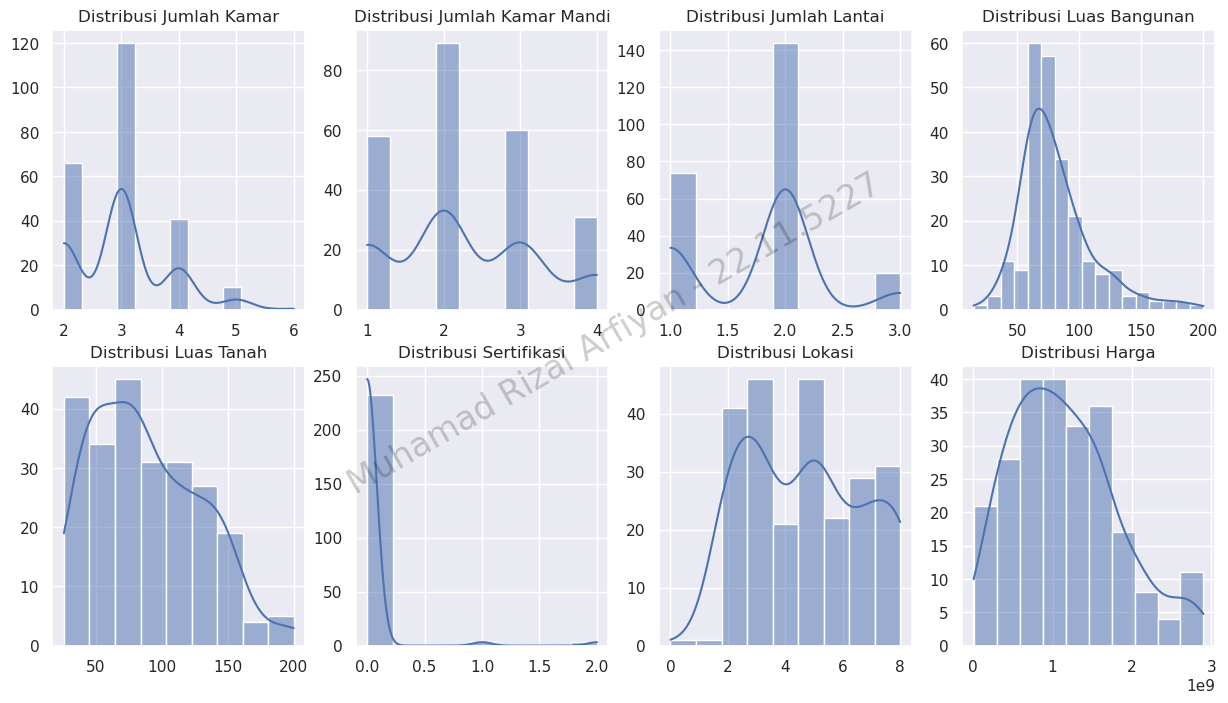

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.ravel()
for i, col in enumerate(column):
    sns.histplot(df1[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=24,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
    rotation=30,
)
plt.tight_layout()

## Multi Variate Analysis

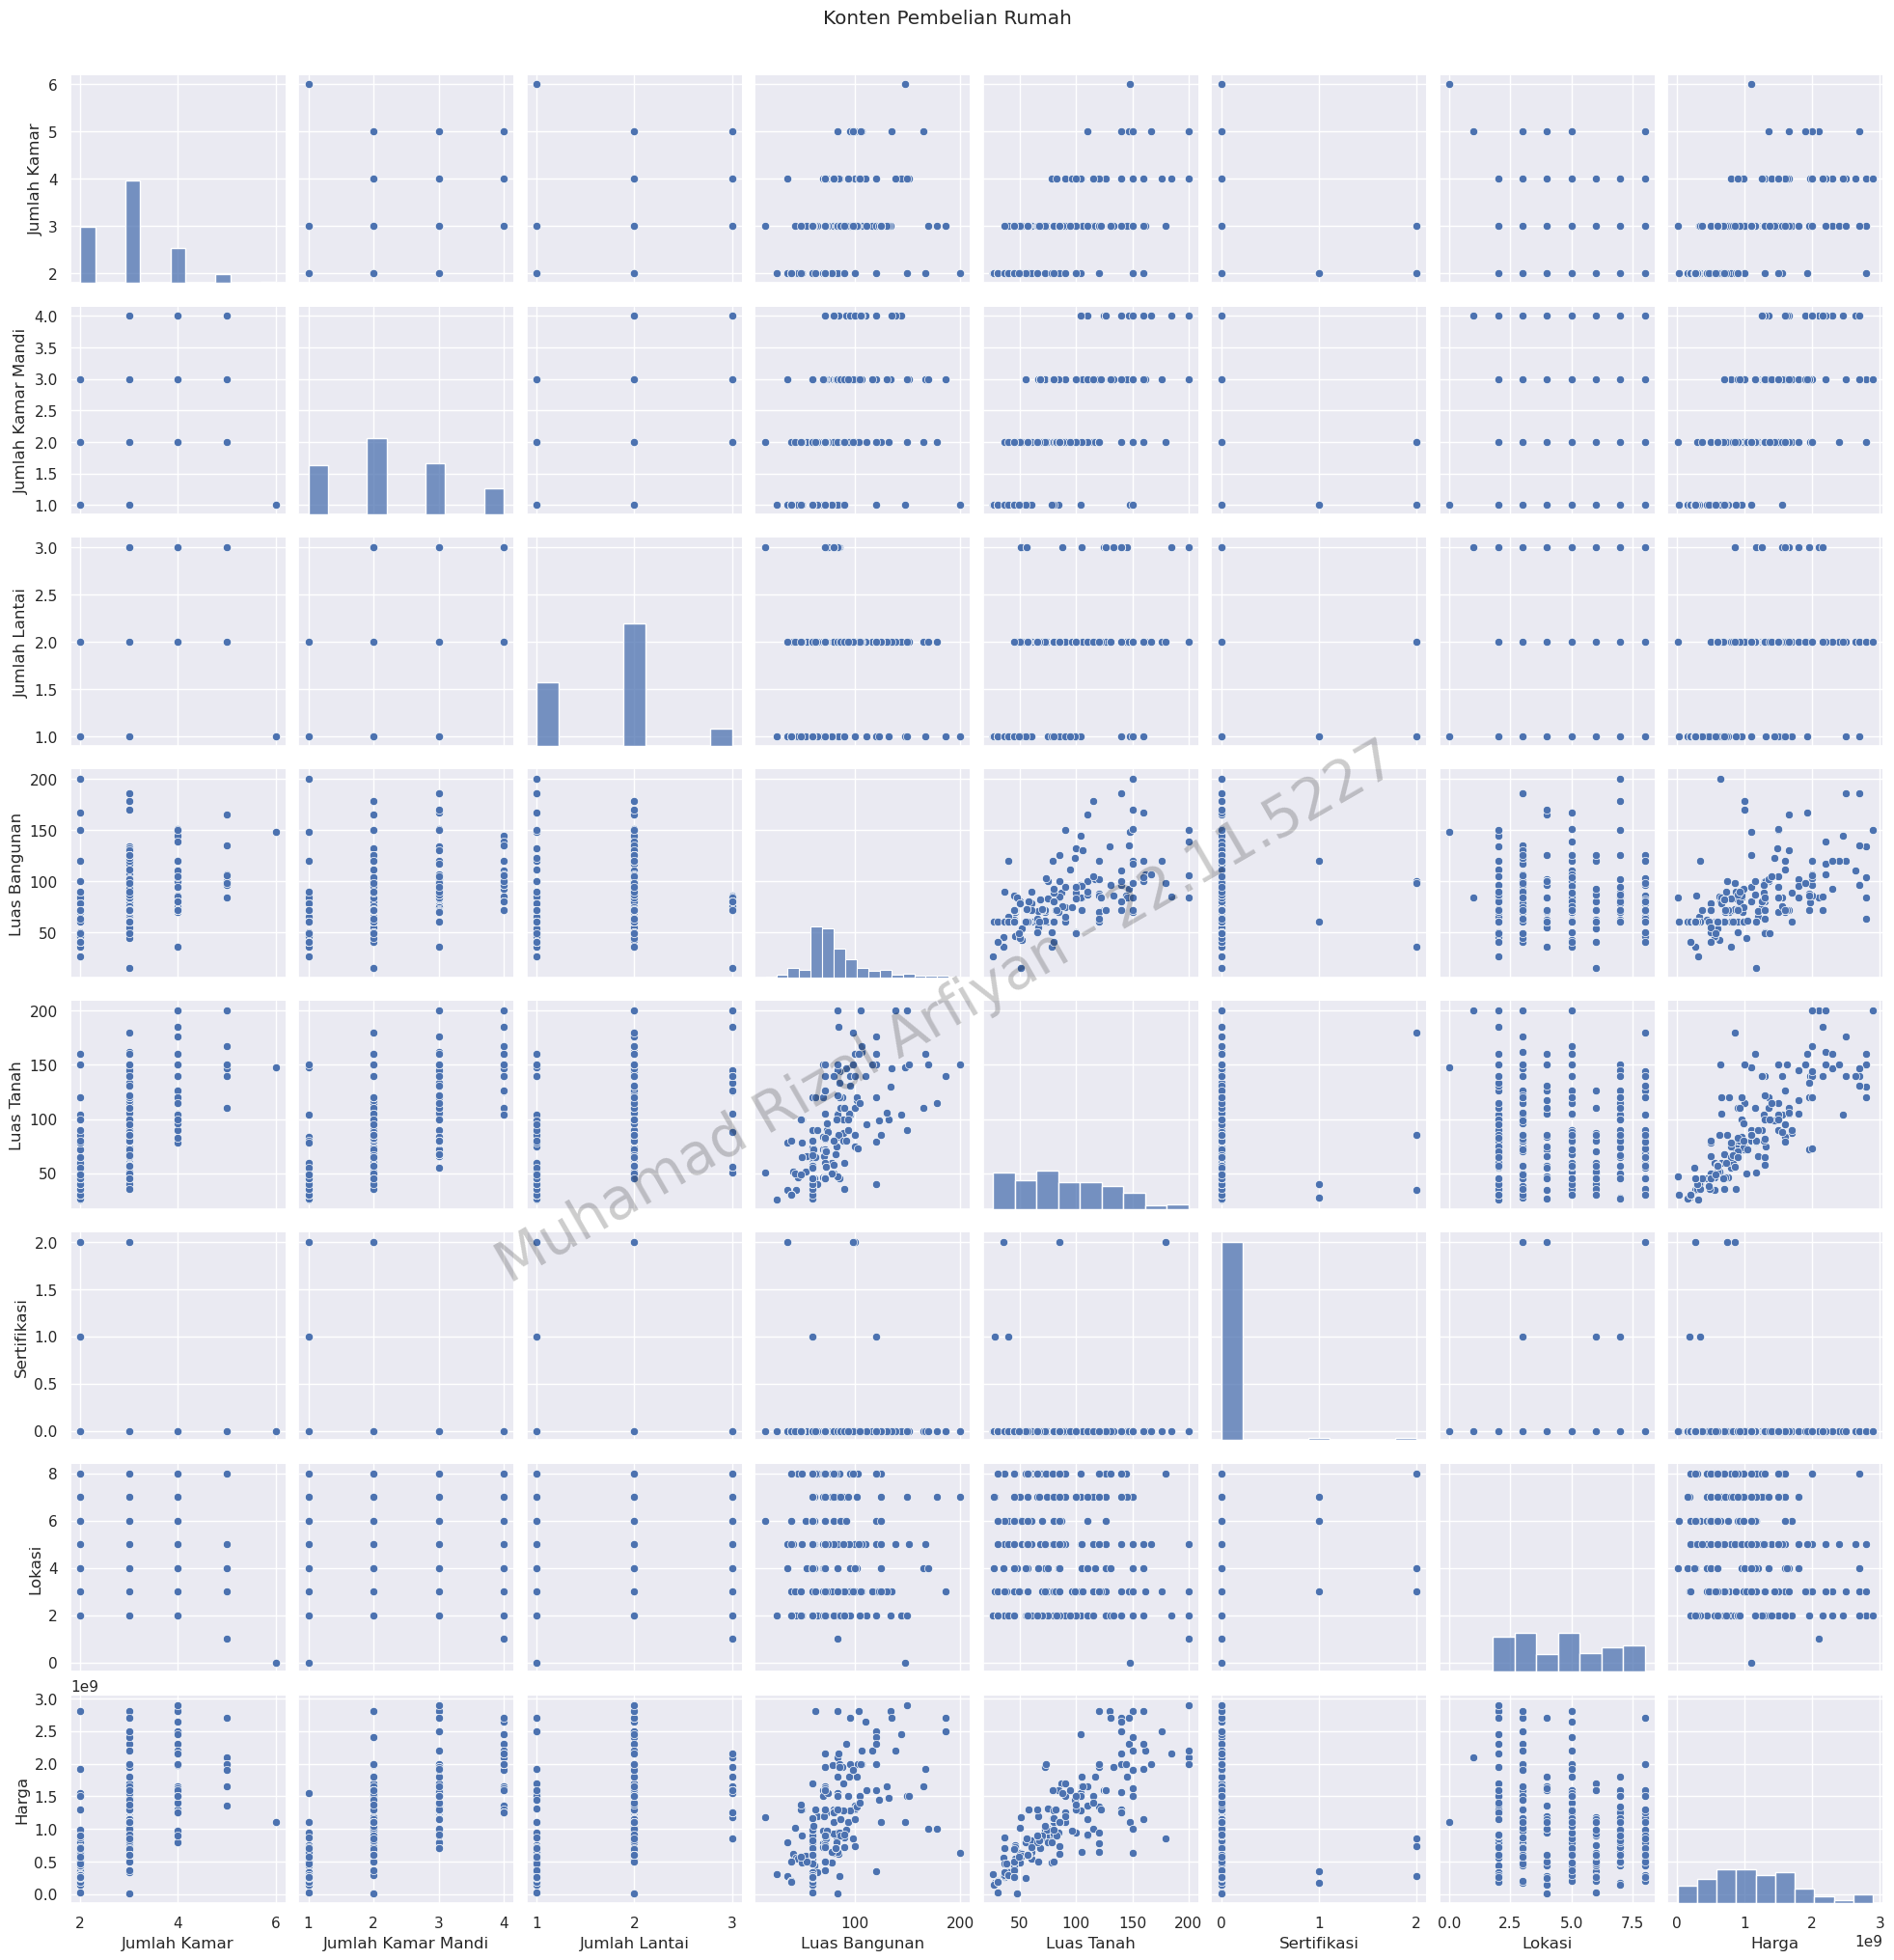

In [16]:
multivariate_data = df1[column]

sns.pairplot(multivariate_data)
plt.suptitle("Konten Pembelian Rumah", y=1.02)
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=42,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
    rotation=30,
)
plt.show()

## Correlation Coefficient

In [17]:
correlation_matrix = df.corr(numeric_only=True)
price_correlation = correlation_matrix[columnX].sort_values(ascending=False)
print(price_correlation)

Harga                 1.000000
Luas Tanah            0.809030
Jumlah Kamar Mandi    0.677947
Jumlah Kamar          0.595801
Luas Bangunan         0.533849
Jumlah Lantai         0.496634
Lokasi               -0.128033
Sertifikasi          -0.150977
Name: Harga, dtype: float64


<Axes: >

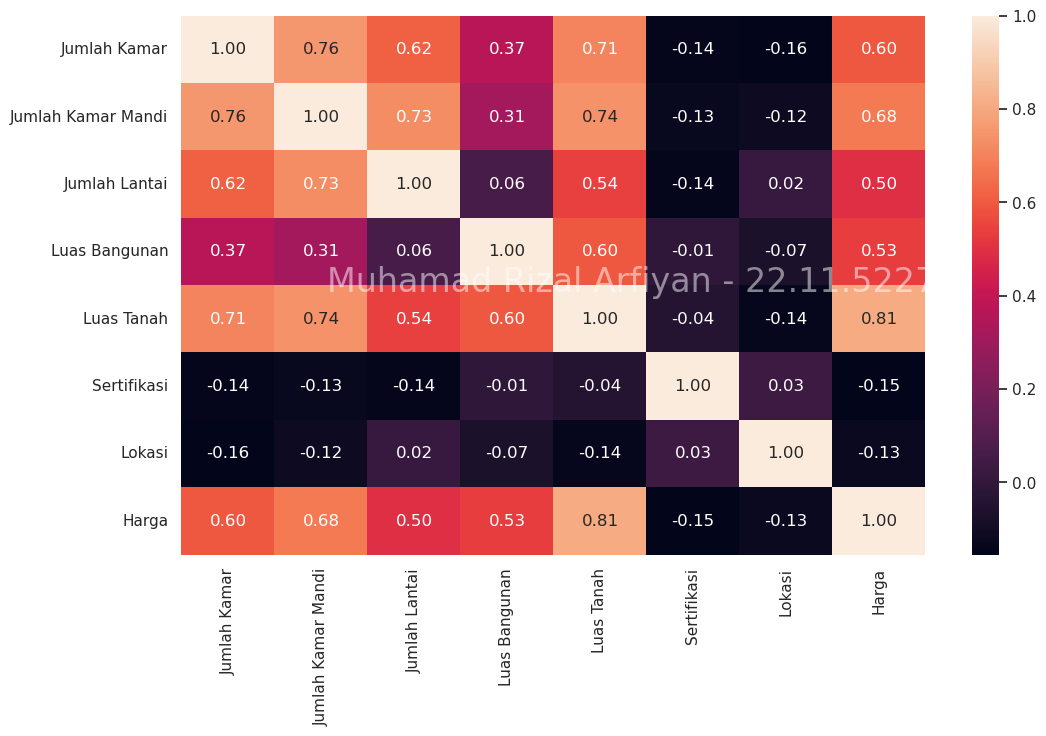

In [18]:
plt.figure(figsize=(12, 7))

corr = df[column].corr()
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=24,
    color="white",
    ha="center",
    va="center",
    alpha=0.5,
    transform=plt.gcf().transFigure,
)
sns.heatmap(corr, annot=True, fmt=".2f")

In [19]:
highestVariable = price_correlation.index[1]
highestValue = price_correlation[1]
print(highestVariable, " - ", highestValue)

Luas Tanah  -  0.8090299175127004


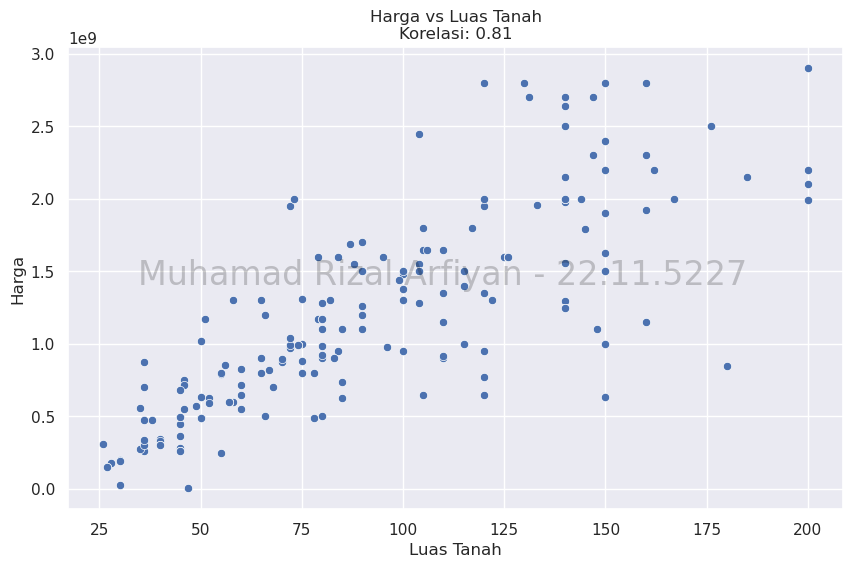

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=highestVariable, y=columnX, data=df1)
plt.title(
    f"{columnX} vs {highestVariable}\nKorelasi: {highestValue:.2f}"
)
plt.xlabel(highestVariable)
plt.ylabel(columnX)
plt.grid(True)
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=24,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
)
plt.show()

## Model Regresi Linier Sederhana (Korelasi tertinggi)

### Data Preparation (Membagi data train dan test)

In [21]:
df2 = df1.copy()
df2 = df2[[columnX, highestVariable]]
df2.head()

,Harga,Luas Tanah
0,1100000000,148
1,2100000000,200
2,2800000000,130
3,1480000000,100
4,2300000000,147


In [22]:
np.random.seed(42)
split = np.random.rand(len(df2)) < 0.8
train = df2[split]
test = df2[~split]

print(test)
print(train)

          Harga  Luas Tanah
1    2100000000         200
7      30000000          30
11   1650000000         105
12   1690000000          87
33    150500000          27
34    285000000          45
35    265000000          36
43   1600000000          84
50   1600000000         126
52   1600000000         126
53   1600000000         126
55   1600000000         126
62    875000000          70
67    650000000         120
69    625000000          85
73    715000000          46
80   1200000001          66
88   2700000001         131
104  1310000000          75
112  2700000001         131
113  2000000004         144
115  1950000000         120
116  2200000000         162
118   300000004          36
120   950000000         100
121   855000000          56
126   950000000         120
127   700000000          68
134  2150000000         185
139   595000077          52
140   200000000          30
150  1600000001          79
154   980000000          96
165   335000000          36
178  1170000000     

In [23]:
X_train = np.asanyarray(train[[highestVariable]])
y_train = np.asanyarray(train[[columnX]])

X_test = np.asanyarray(test[[highestVariable]])
y_test = np.asanyarray(test[[columnX]])

### Modeling

In [24]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
coef = lr_model.coef_[0][0]
intercept = lr_model.intercept_[0]

print("Coefficients: ", coef)
print("Intercept: ", intercept)

Coefficients:  12917901.538118597
Intercept:  -6299488.803052187


Text(0.5, 0.5, 'Muhamad Rizal Arfiyan - 22.11.5227')

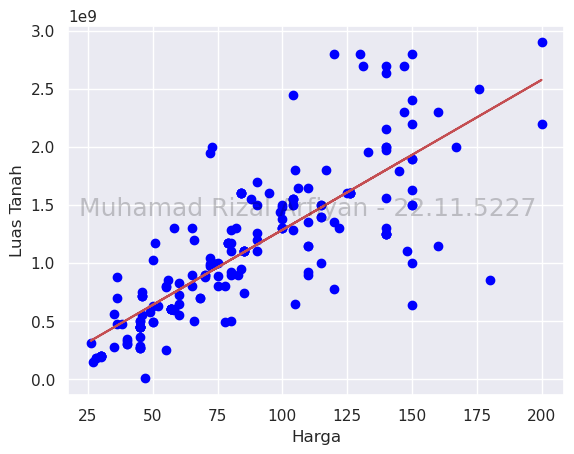

In [26]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, coef * X_train + intercept, "-r")
plt.xlabel(columnX)
plt.ylabel(highestVariable)
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=18,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
)

### Prediksi

In [27]:
y_pred = lr_model.predict(X_test)

print("Data asli: \n", y_test[0:10])
print("\n")
print("Hasil prediksi: \n", y_pred[0:10])

Data asli: 
 [[2100000000]
 [  30000000]
 [1650000000]
 [1690000000]
 [ 150500000]
 [ 285000000]
 [ 265000000]
 [1600000000]
 [1600000000]
 [1600000000]]


Hasil prediksi: 
 [[2.57728082e+09]
 [3.81237557e+08]
 [1.35008017e+09]
 [1.11755795e+09]
 [3.42483853e+08]
 [5.75006080e+08]
 [4.58744967e+08]
 [1.07880424e+09]
 [1.62135610e+09]
 [1.62135610e+09]]


In [28]:
data = np.array([[27]])
lr_model.predict(data)

array([[3.42483853e+08]])

In [29]:
import locale

def rupiah_format(angka, with_prefix=False, desimal=2):
    locale.setlocale(locale.LC_NUMERIC, 'id_ID')
    rupiah = locale.format("%.*f", (desimal, angka), True)
    if with_prefix:
        return "Rp. {}".format(rupiah)
    return rupiah

Contoh data asli harga dan luas tanah

In [30]:
df3 = df2.copy()
df3['Harga'] = df3['Harga'].apply(lambda x: rupiah_format(x, True))
df3.head(10)

,Harga,Luas Tanah
0,"Rp. 1.100.000.000,00",148
1,"Rp. 2.100.000.000,00",200
2,"Rp. 2.800.000.000,00",130
3,"Rp. 1.480.000.000,00",100
4,"Rp. 2.300.000.000,00",147
5,"Rp. 975.000.000,00",72
6,"Rp. 885.000.000,00",75
7,"Rp. 30.000.000,00",30
8,"Rp. 632.800.000,00",50
9,"Rp. 179.000.000,00",28


Prediksi harga berdasarkan luas tanah

In [33]:
luasTanah = [90, 280, 354]
for val in luasTanah:
    price = lr_model.predict([[val]])[0][0]
    print(val, "\t -> ", rupiah_format(price, True))

90 	 ->  Rp. 1.156.311.649,63
280 	 ->  Rp. 3.610.712.941,87
354 	 ->  Rp. 4.566.637.655,69


## Evaluasi Model menggunakan RMSE

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean squared error (MSE) \t:", mse)
print("Root mean squared error (RMSE) \t:", rmse)
print("R-squared score (R2) \t\t:", r2)

Mean squared error (MSE) 	: 1.629988829254789e+17
Root mean squared error (RMSE) 	: 403731201.3276642
R-squared score (R2) 		: 0.697137262077917
